# Random noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
MAX_SAMPLES=1000
START=10
PLOT_SIZE=(16,10)

## Simple random number generation (uniform)

In [3]:
values=np.random.uniform(low=0, high=1, size=MAX_SAMPLES) + START

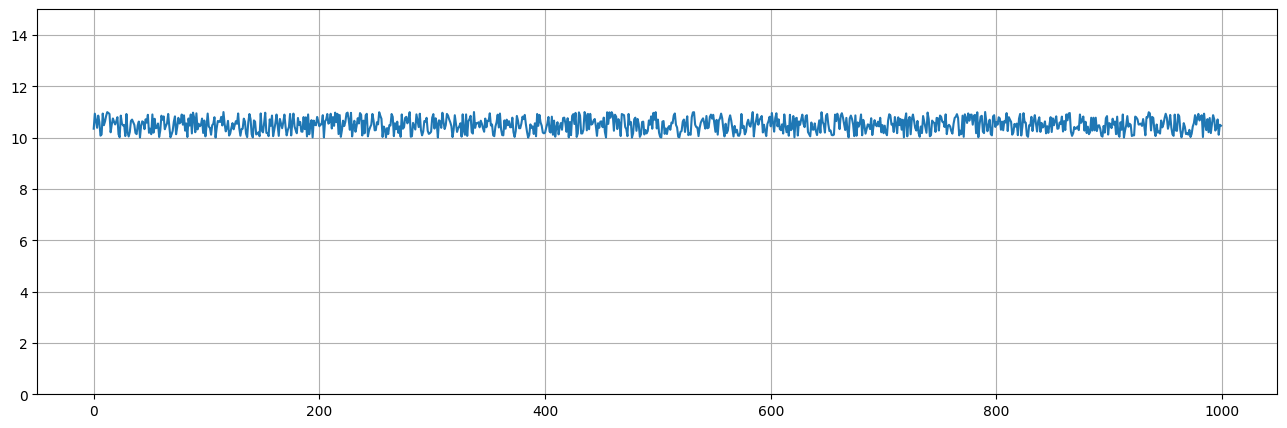

In [4]:
plt.figure(figsize=(16,5))
plt.grid()
plt.ylim(0,15)
plt.plot(range(MAX_SAMPLES), values)

# Simple random number generation (standard)

In [5]:
values=np.random.standard_normal(size=MAX_SAMPLES)


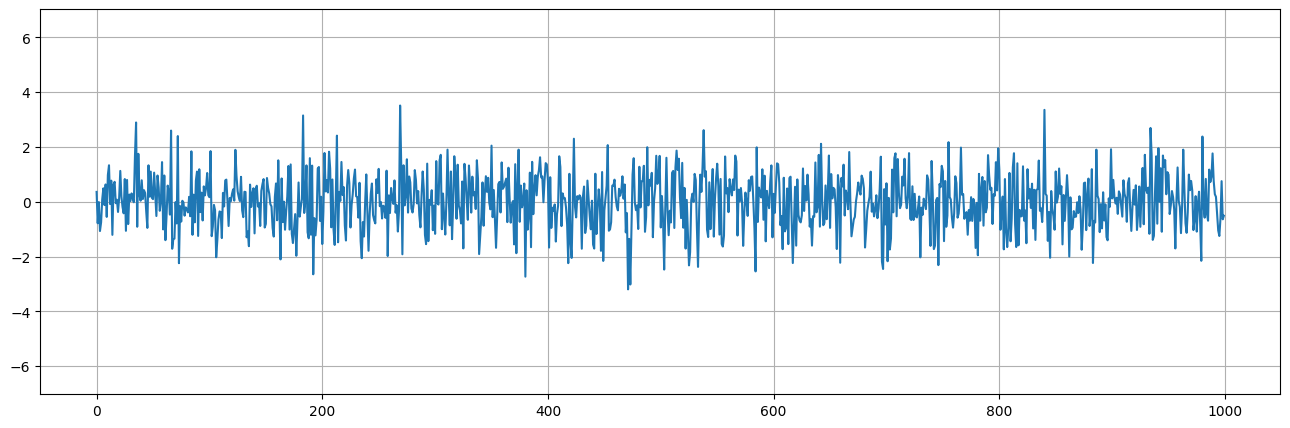

In [6]:
upper_y = max(values)
plt.figure(figsize=(16,5))
plt.grid()
plt.ylim(-2*upper_y,2*upper_y)
plt.plot(range(len(values)), values)

(array([  5.,  27.,  87., 183., 240., 250., 141.,  55.,   8.,   4.]),
 array([-3.19536871, -2.52466389, -1.85395907, -1.18325425, -0.51254943,
         0.15815539,  0.82886021,  1.49956503,  2.17026985,  2.84097467,
         3.5116795 ]),
 <BarContainer object of 10 artists>)

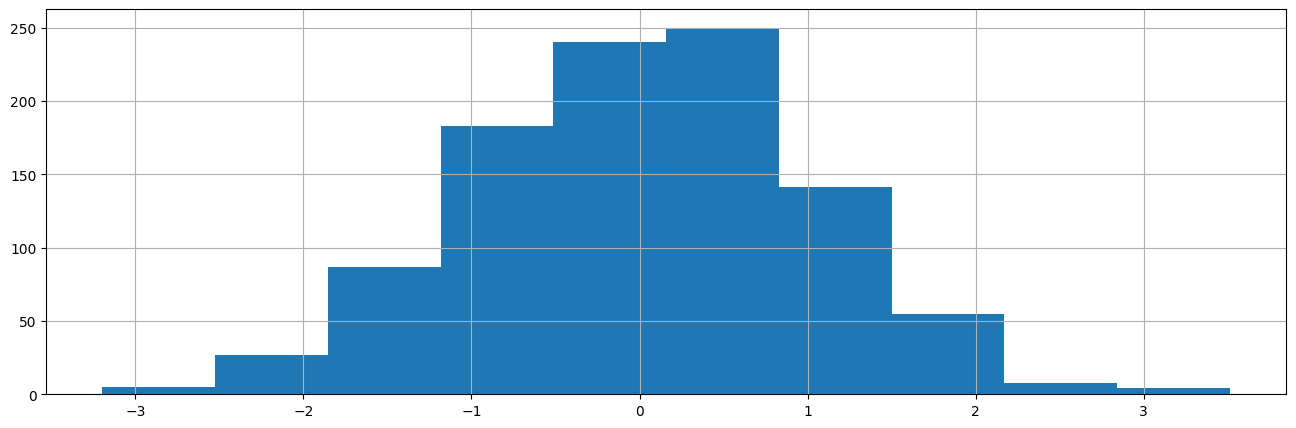

In [7]:
plt.figure(figsize=(16,5))
plt.grid()
#plt.ylim(-2*upper_y,2*upper_y)
plt.hist(values)

# Cumsum demo

In [8]:
nos=np.array([1,2,3,4,5])

In [9]:
np.cumsum(nos)

array([ 1,  3,  6, 10, 15])

# Random walk with uniform 

In [10]:
errors=np.random.uniform(low=-1, high=1,size=MAX_SAMPLES)

In [11]:
errors[-10:]

array([ 9.11535205e-01,  3.76123686e-02, -1.20453568e-01,  4.17294474e-01,
       -2.26082127e-01, -1.17858374e-01,  7.39595455e-01, -6.49099065e-04,
       -1.47115963e-01, -1.08314833e-01])

In [12]:
cum_errors=np.cumsum(errors)


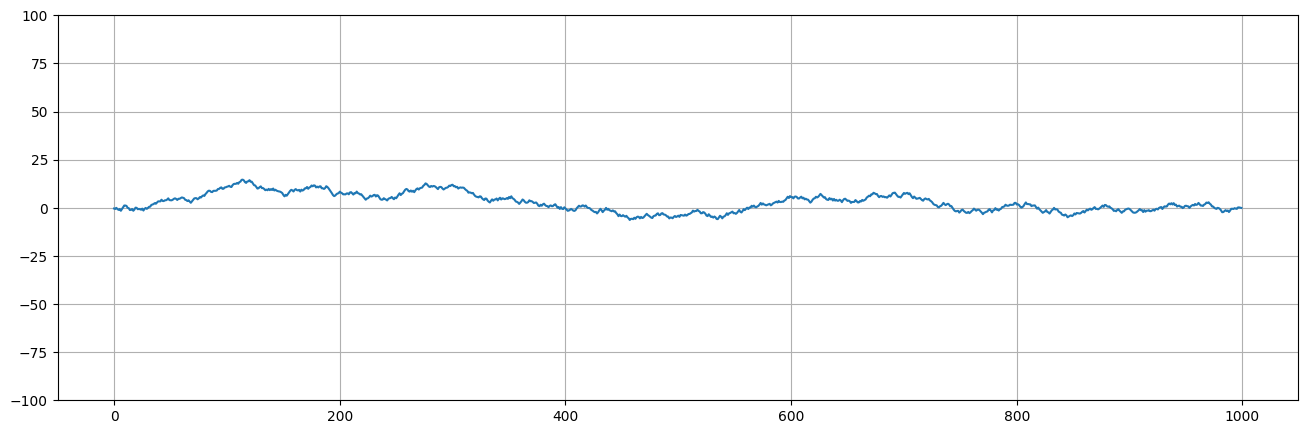

In [13]:
plt.figure(figsize=(16,5))
plt.grid()
plt.ylim(-100,100)
plt.plot(range(MAX_SAMPLES), cum_errors)

# Random walk with standard_normal

In [14]:
steps=np.random.standard_normal(size=MAX_SAMPLES)

In [15]:
max(steps), min(steps), np.mean(steps), np.std(steps)

(3.2616331673481525,
 -3.305880511816927,
 -0.027389461647531404,
 1.004803655384534)

In [16]:
values=np.cumsum(steps)

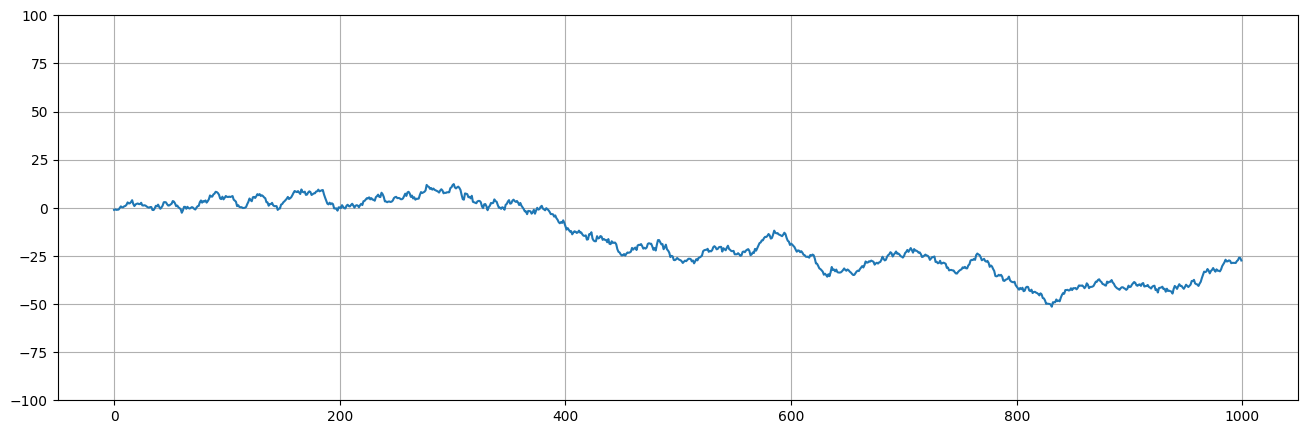

In [17]:
plt.figure(figsize=(16,5))
plt.grid()
plt.ylim(-100,100)
plt.plot(range(MAX_SAMPLES), values)

# First difference - flat array

In [18]:
nos=np.arange(10)
nos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
np.diff(nos)

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

# First difference of a random walk

In [20]:
values=np.random.standard_normal(size=MAX_SAMPLES)
min(values),max(values), np.mean(values)

(-2.7946455845045697, 3.4904792742389623, -0.010385974804351791)

In [21]:
first_diff = np.diff(values)
np.mean(first_diff)

-0.0010204511957015057

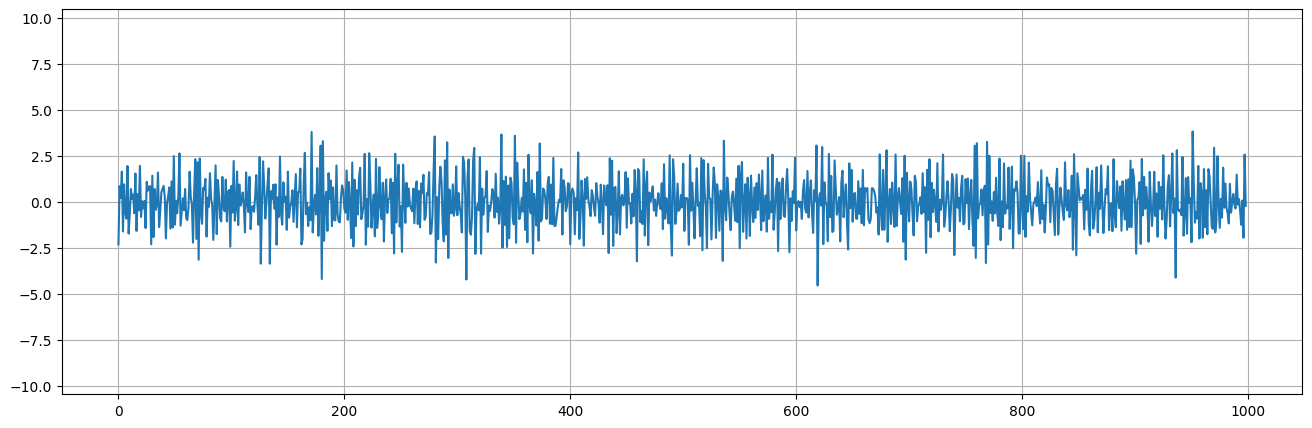

In [22]:
max_y = max(values)

plt.figure(figsize=(16,5))
plt.grid()
plt.ylim(-3*max_y,3*max_y)
plt.plot(range(len(first_diff)), first_diff)

# Stationary series

In [65]:
import random
#randvalues=np.random.standard_normal(size=MAX_SAMPLES)

def produce_random_walk(sample_count:int, multiplier:float, drift=0.0)->np.ndarray:
    walk_values=np.zeros(shape=[sample_count] ,dtype=float)
    walk_values[0]=drift
    for index in range(1,len(walk_values)):
        previous=walk_values[index-1]
        delta=(random.random() -0.5)*2 #between -1 and 1
        #walk_values[index]=previous + multiplier*delta
        walk_values[index]=previous*multiplier + delta + drift
    return walk_values

In [66]:
def plot_walk(values:np.ndarray, title: str):
    max_y = max(values)
    plt.figure(figsize=PLOT_SIZE)
    plt.grid()
    plt.ylim(-3*max_y,3*max_y)
    plt.title(title)
    plt.plot(range(len(values)), values)   

## Multiplier 0.5

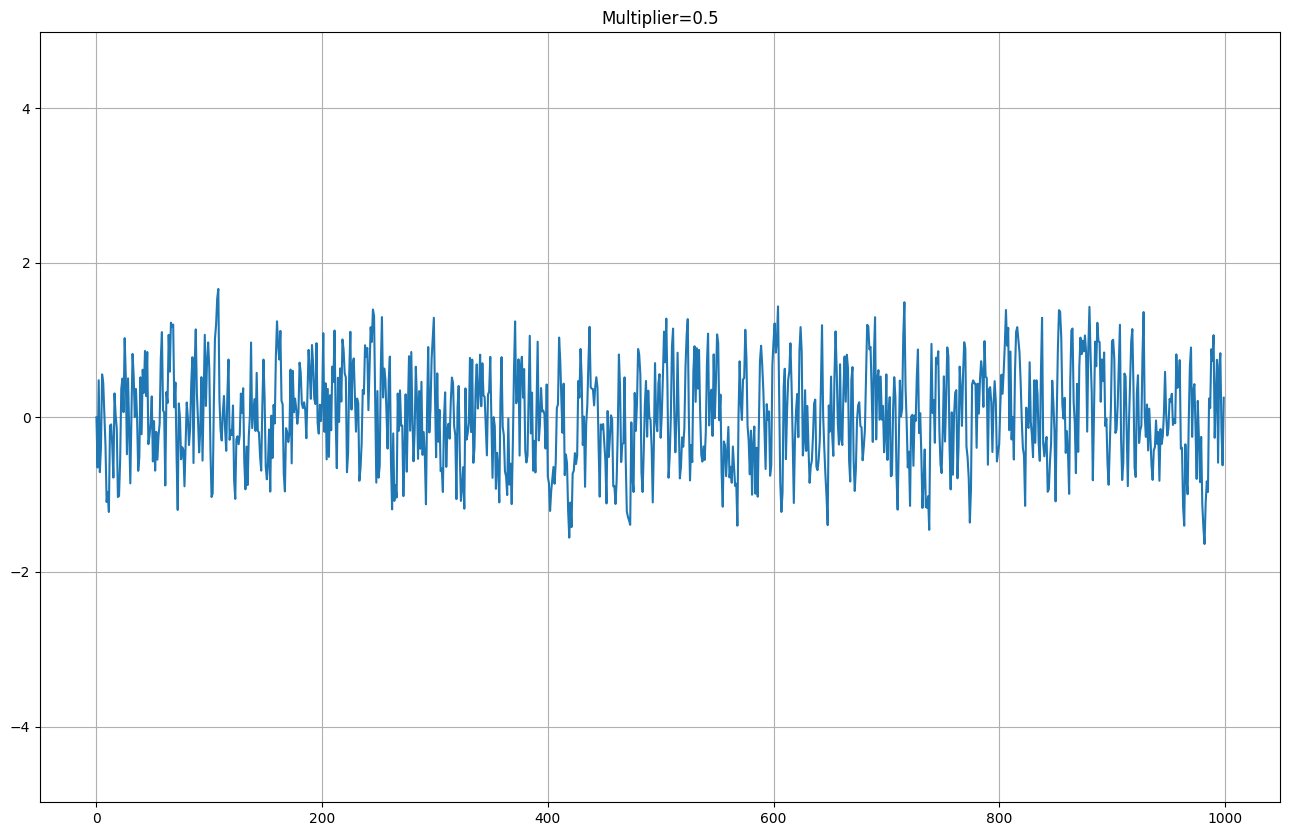

In [52]:
values_05=produce_random_walk(sample_count=MAX_SAMPLES, multiplier=0.5)
plot_walk(values=values_05, title=f"Multiplier={0.5}")

## Multiplier 1.0

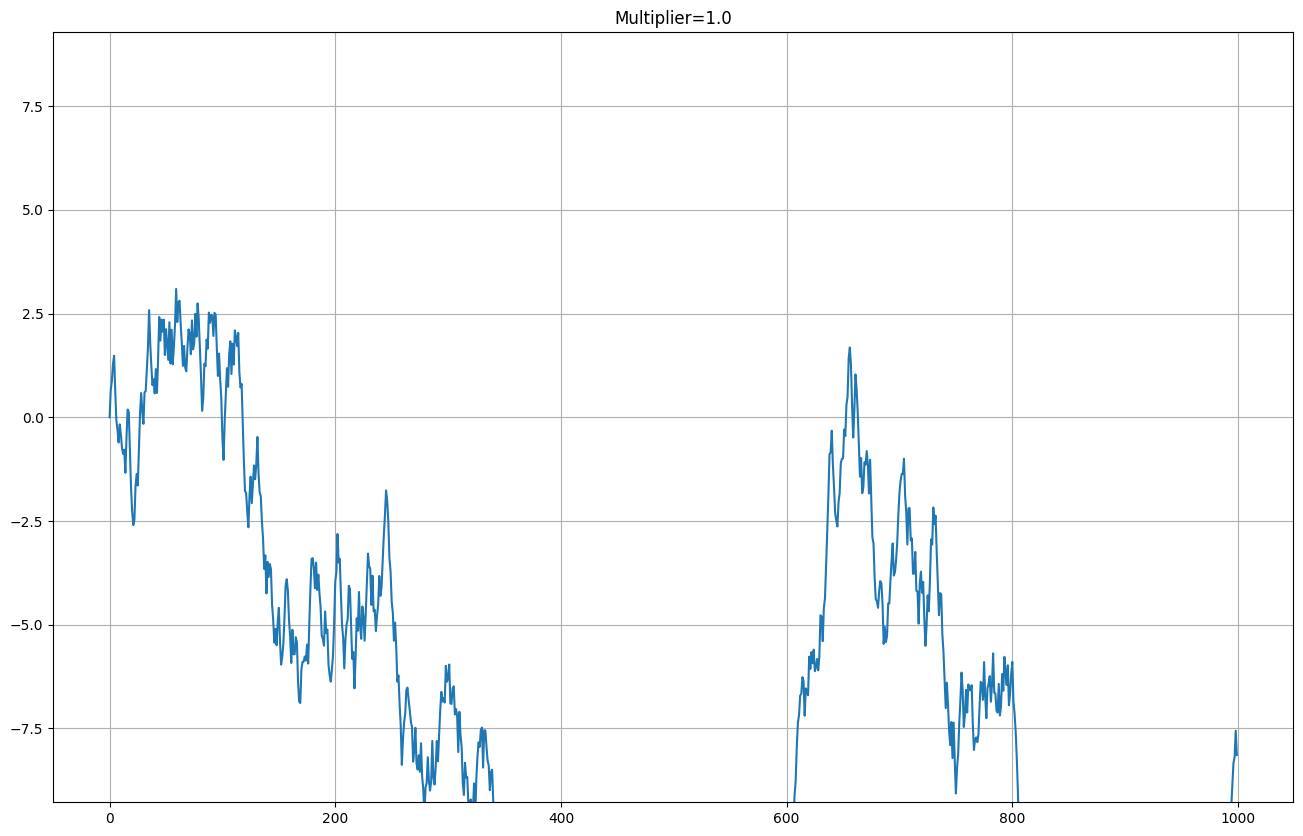

In [53]:
values_10=produce_random_walk(sample_count=MAX_SAMPLES, multiplier=1.0)
plot_walk(values=values_10, title=f"Multiplier={1.0}")


## Multiplier 0.25

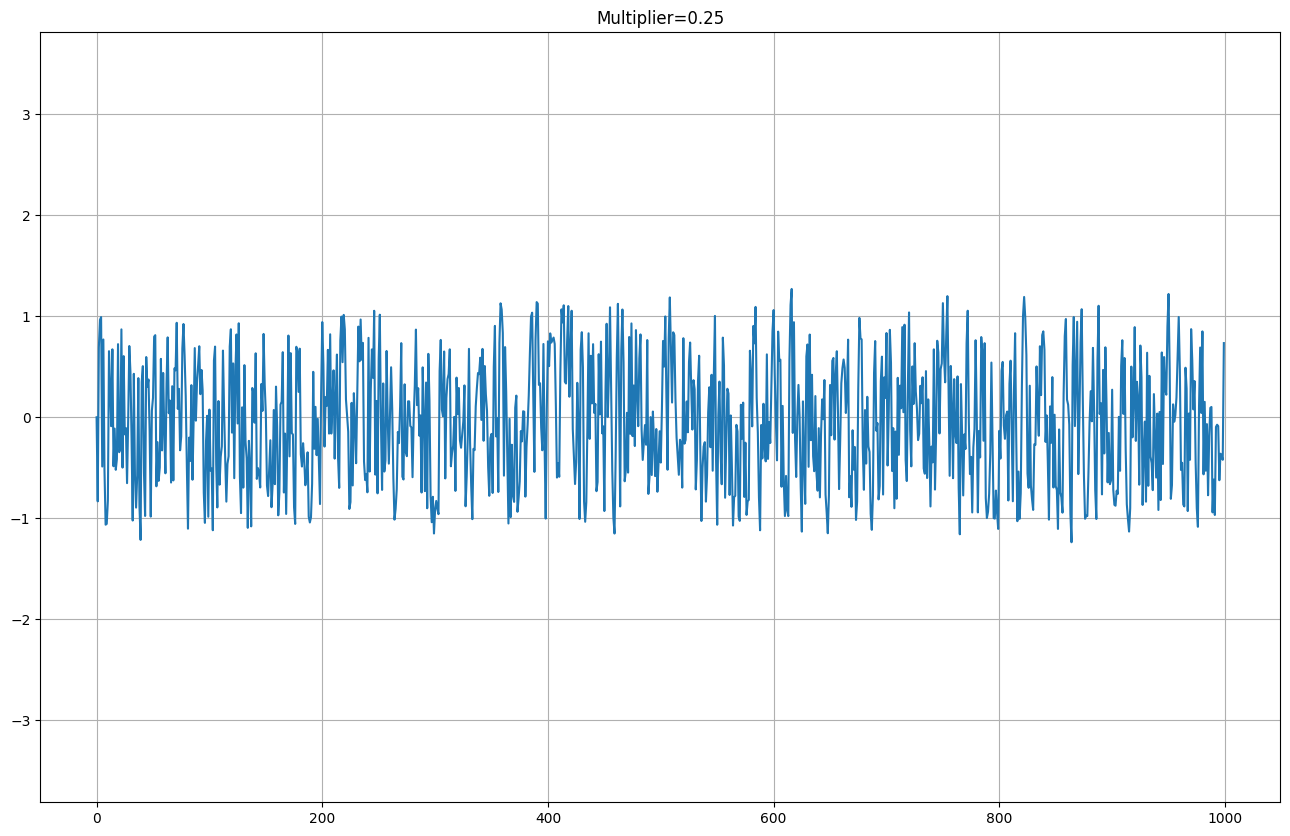

In [54]:
values_05=produce_random_walk(sample_count=MAX_SAMPLES, multiplier=0.25)
plot_walk(values=values_05, title=f"Multiplier={0.25}")

## Multiplier 0.1

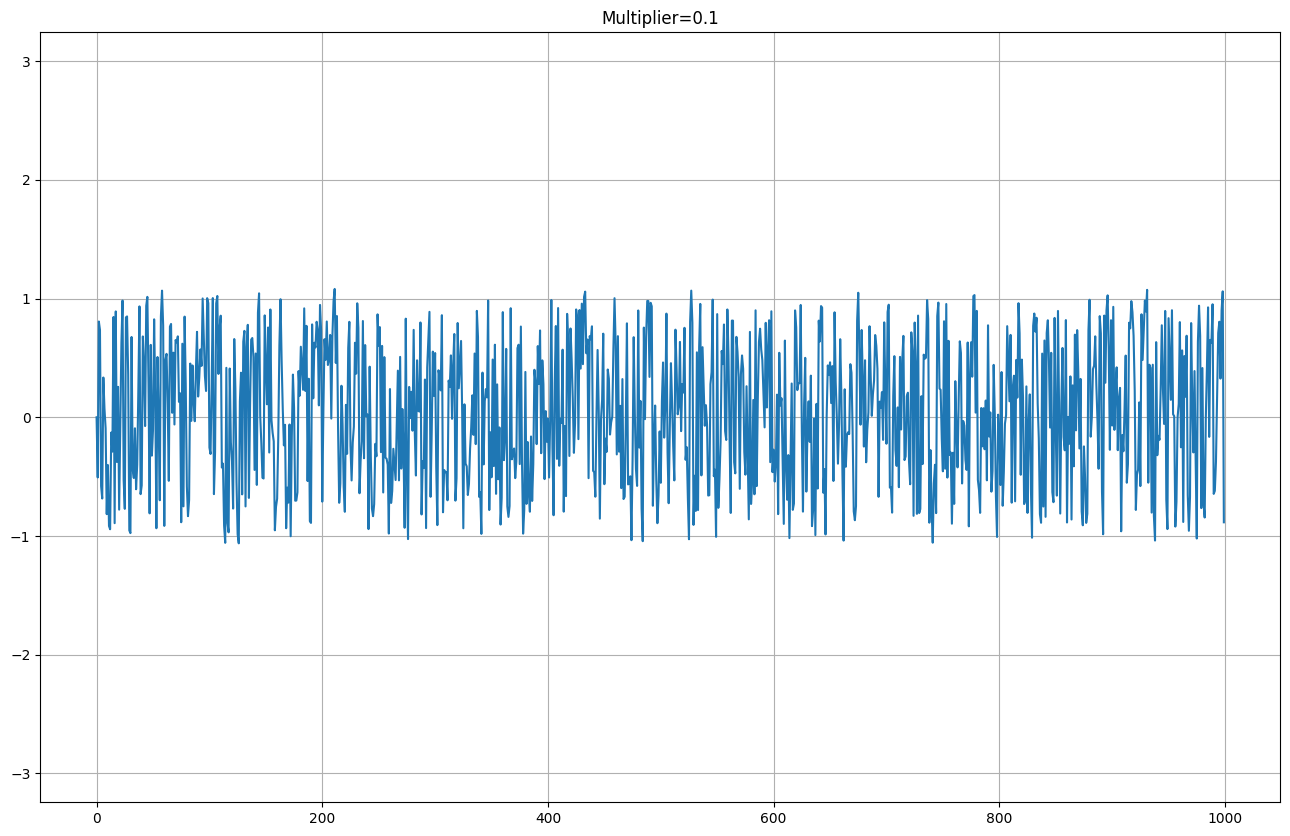

In [55]:
values_05=produce_random_walk(sample_count=MAX_SAMPLES, multiplier=0.1)
plot_walk(values=values_05, title=f"Multiplier={0.1}")

# Stationary series with Drift

## Drift=30

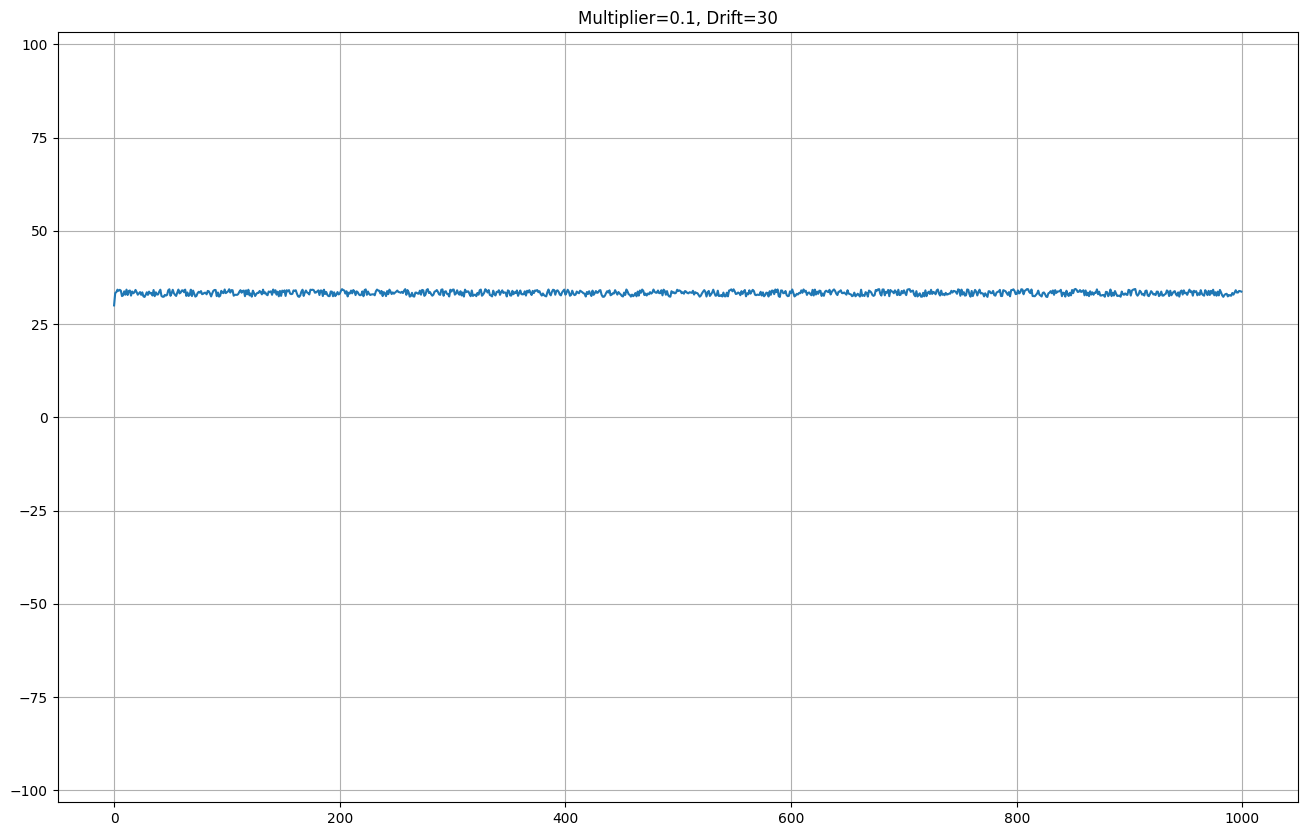

In [68]:
values_05=produce_random_walk(sample_count=MAX_SAMPLES, multiplier=0.1, drift=30)
plot_walk(values=values_05, title=f"Multiplier={0.1}, Drift={30}")

## Drift=1

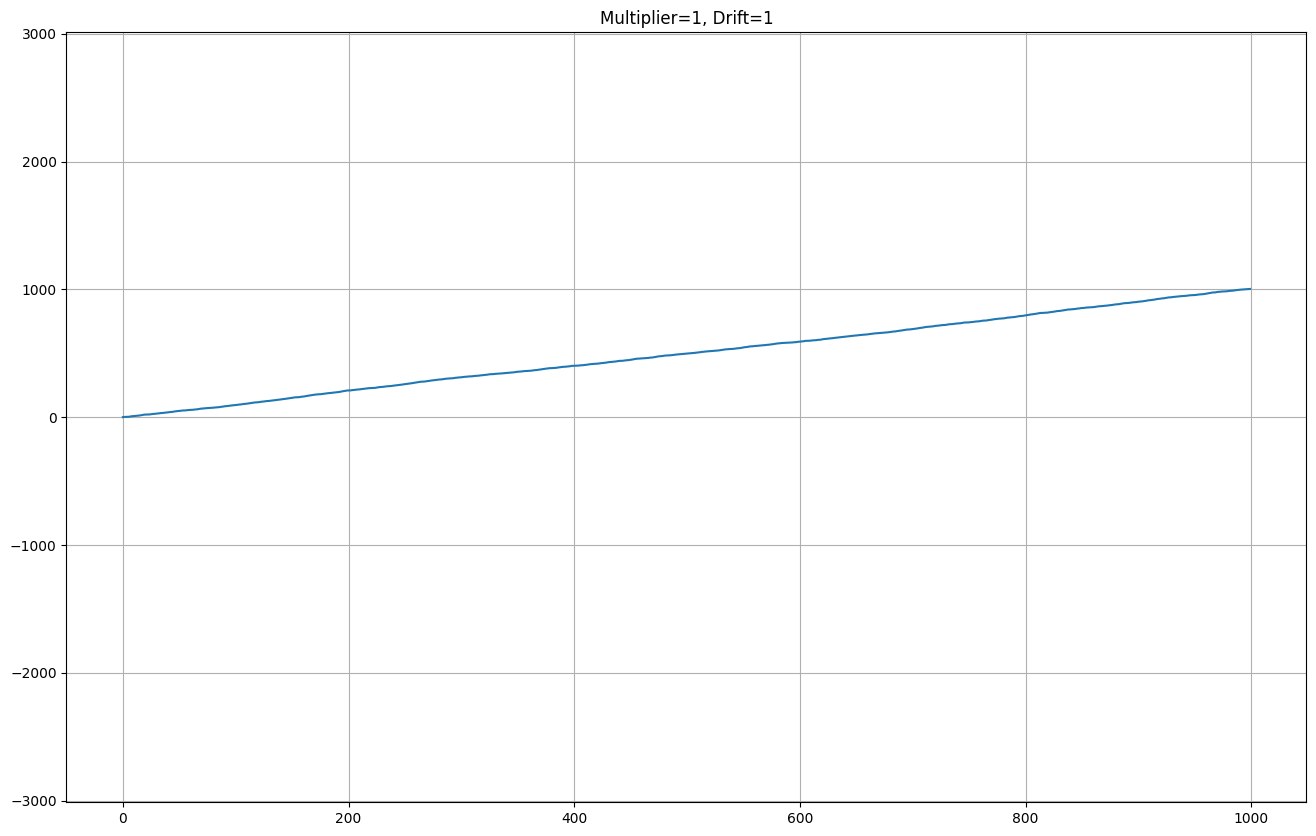

In [70]:
drift=1
mpy=1
values_05=produce_random_walk(sample_count=MAX_SAMPLES, multiplier=mpy, drift=drift)
plot_walk(values=values_05, title=f"Multiplier={mpy}, Drift={drift}")

## Drift=0

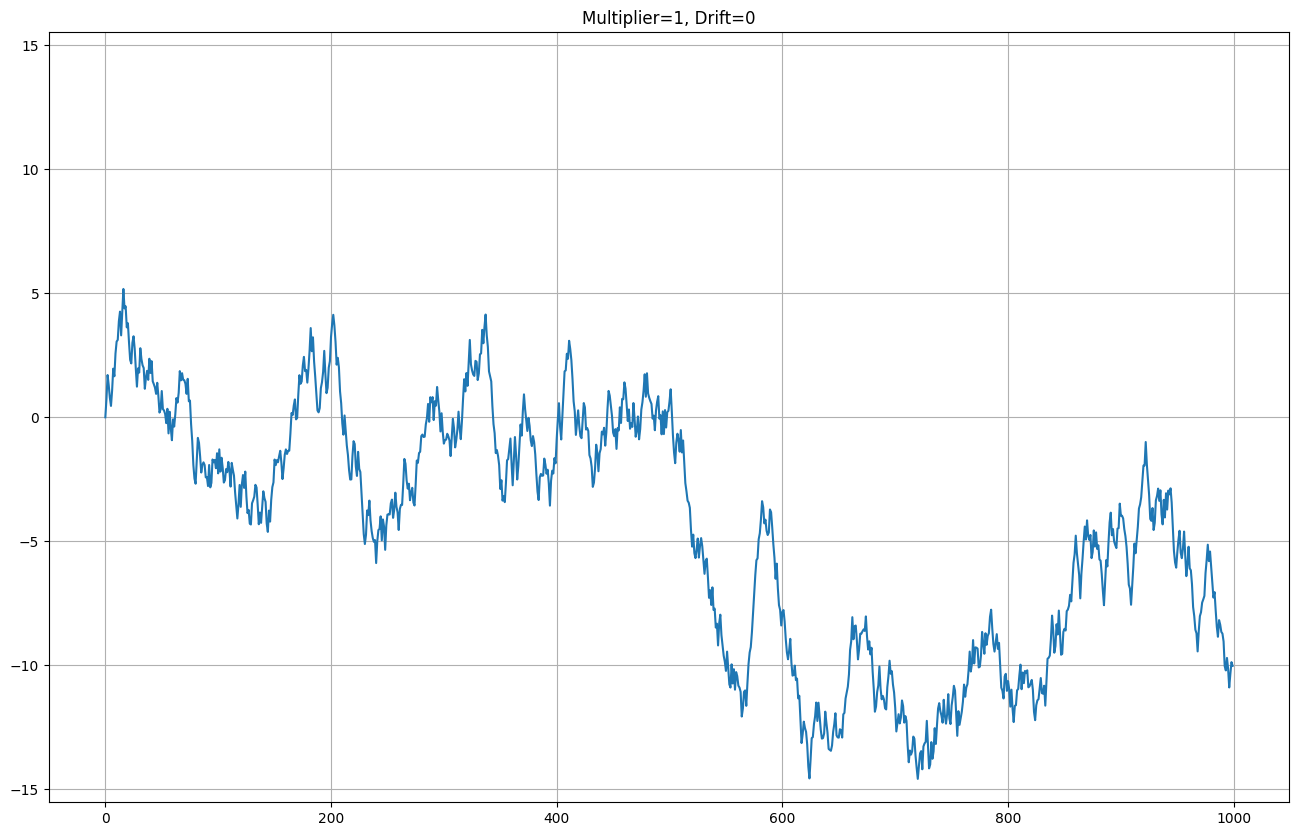

In [71]:
drift=0
mpy=1
values_05=produce_random_walk(sample_count=MAX_SAMPLES, multiplier=mpy, drift=drift)
plot_walk(values=values_05, title=f"Multiplier={mpy}, Drift={drift}")

## Drift=0.2

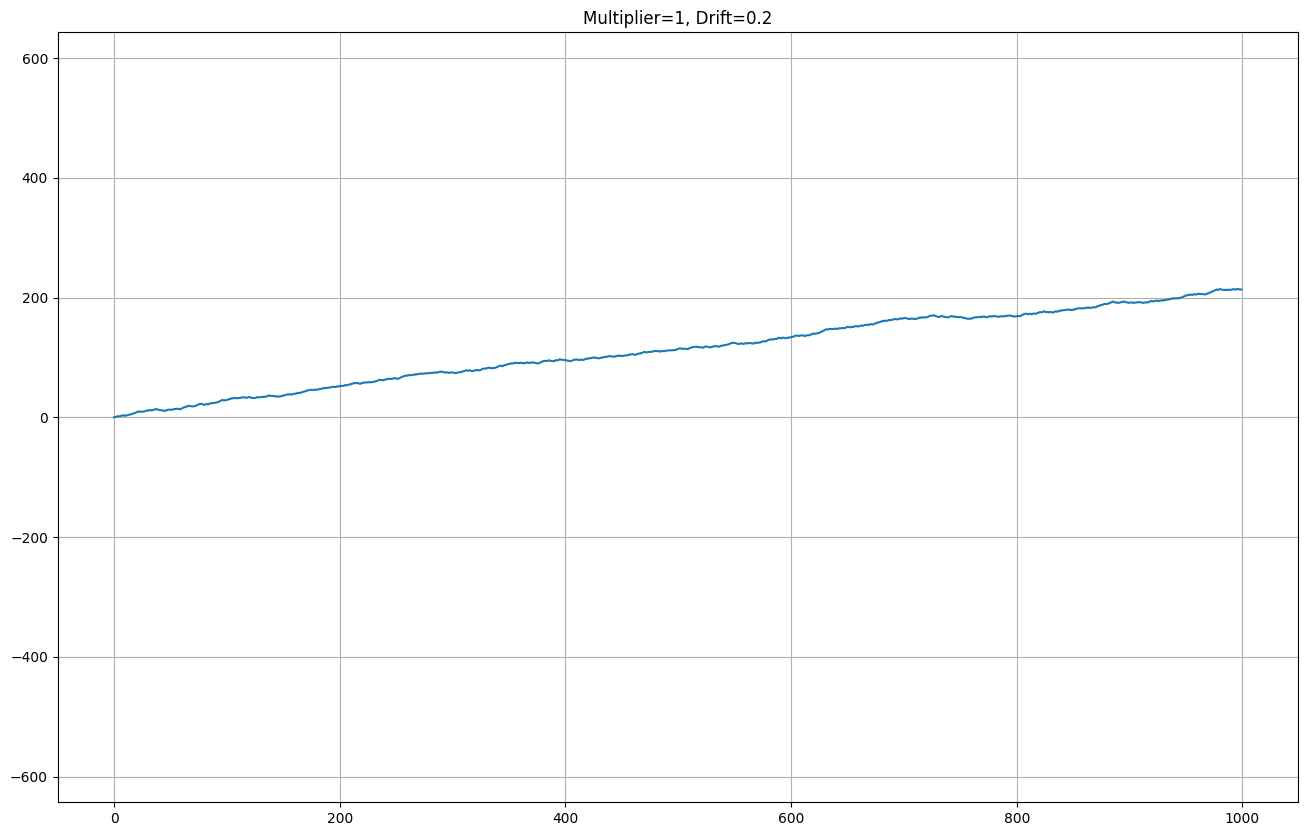

In [72]:
drift=0.2
mpy=1
values_05=produce_random_walk(sample_count=MAX_SAMPLES, multiplier=mpy, drift=drift)
plot_walk(values=values_05, title=f"Multiplier={mpy}, Drift={drift}")